In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as op
from scipy.integrate import trapz,simps
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
v = pd.read_csv('result_7', encoding = "ISO-8859-1", engine='python')
v

,allmask_g,allmask_r,allmask_z,anymask_g,anymask_r,anymask_z,brickid,brickname,brick_primary,brightstarinblob,...,snr_w4,snr_z,type,w1_w2,w2_w3,w3_w4,wise_coadd_id,wisemask_w1,wisemask_w2,z_w1
0,0,0,0,0,0,0,475175,3299p257,1,0,...,-0.203402,12.13880,PSF,-1.372540,NaN,NaN,3300p257,0,0,1.08618
1,0,0,0,0,0,0,475175,3299p257,1,0,...,2.164960,8.06203,PSF,NaN,NaN,4.71022,3300p257,0,0,NaN
2,0,0,0,0,0,0,475175,3299p257,1,0,...,-2.258560,16.66540,PSF,NaN,NaN,NaN,3300p257,0,0,NaN
3,0,0,0,0,0,0,475175,3299p257,1,0,...,-4.090530,35.12620,PSF,NaN,5.567720,NaN,3300p257,0,0,NaN
4,0,0,0,0,0,0,475175,3299p257,1,0,...,0.048777,6.16678,REX,NaN,NaN,0.62468,3300p257,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,473877,3305p255,1,1,...,0.624333,17.33850,PSF,NaN,NaN,2.52101,3300p257,0,0,NaN
9996,0,0,0,0,0,0,473877,3305p255,1,0,...,0.043213,21.26910,EXP,-0.456869,NaN,NaN,3300p257,0,0,-0.181917
9997,0,0,0,0,0,0,473877,3305p255,1,0,...,-0.137920,3.65524,PSF,NaN,NaN,NaN,3300p257,0,0,1.9705
9998,0,0,0,0,0,0,473877,3305p255,1,0,...,0.008970,10.56870,REX,-0.575283,0.765625,-2.84157,3300p257,0,0,2.45754


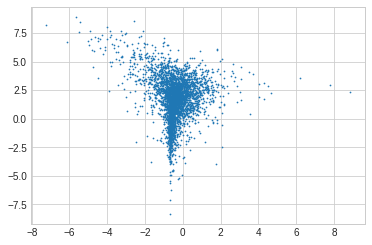

In [3]:
#Primera prueba
plt.scatter(v['w1_w2'], v['w2_w3'], s = 0.5, cmap = v['mag_r'])

In [4]:
#Tipos de estrellas
tipos = v['type'].unique()
tipos

array(['PSF', 'REX', 'DEV', 'EXP', 'COMP'], dtype=object)

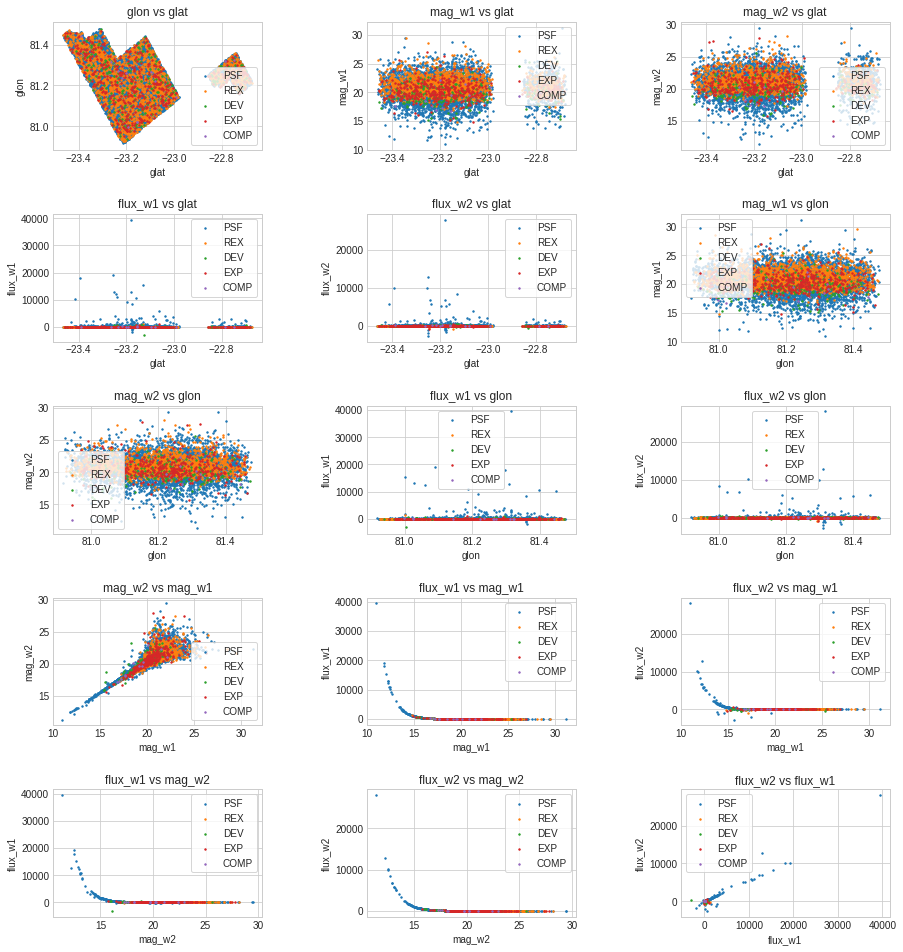

In [6]:
graf = ['glat', 'glon', 'mag_w1', 'mag_w2', 'flux_w1', 'flux_w2']
k = 1
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for j in range(len(graf)):
    for l in range(len(graf)):
        if l > j:
            plt.subplot(6, 3, k)
            for i in range(len(tipos)):
                plt.scatter(v[graf[j]][v['type'] == tipos[i]], v[graf[l]][v['type'] == tipos[i]], s = 2.0, label = '{}'.format(tipos[i]))
            plt.title('{} vs {}'.format(graf[l], graf[j]))
            plt.xlabel('{}'.format(graf[j]))
            plt.ylabel('{}'.format(graf[l]))
            plt.legend(frameon = True, loc = 'best')
            k += 1
plt.show()